These exercises will use clustering to explore anomalies. The data set is grocery customer purchase information. 

## Set up Environment

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## Acquire

In [2]:
df = pd.read_csv('customers.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Prepare

Drop the Channel and Region columns as they appear to be discrete labels instead of continuous, measurable variables.

In [5]:
df = df[['Fresh', 'Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [6]:
# Convert data types to float
df = df.astype(float, inplace=True)

In order to use dbscan clustering, our data needs to be in the form of a numpy array as opposed to a pandas dataframe.

In [7]:
# Convert dataframe into a numpy array
np_array = df.values
np_array[0:10]

array([[12669.,  9656.,  7561.,   214.,  2674.,  1338.],
       [ 7057.,  9810.,  9568.,  1762.,  3293.,  1776.],
       [ 6353.,  8808.,  7684.,  2405.,  3516.,  7844.],
       [13265.,  1196.,  4221.,  6404.,   507.,  1788.],
       [22615.,  5410.,  7198.,  3915.,  1777.,  5185.],
       [ 9413.,  8259.,  5126.,   666.,  1795.,  1451.],
       [12126.,  3199.,  6975.,   480.,  3140.,   545.],
       [ 7579.,  4956.,  9426.,  1669.,  3321.,  2566.],
       [ 5963.,  3648.,  6192.,   425.,  1716.,   750.],
       [ 6006., 11093., 18881.,  1159.,  7425.,  2098.]])

It is important to scale the data because we have so many different features. It's good practice to scale so the disparity in variable units is not maginified and skewing the data. Here it may not make much of a difference because they all appear to use the same units. Still, we scale. 

In [15]:
# Fit
scaler = MinMaxScaler().fit(np_array)
# Transform
np_array = scaler.transform(np_array)
# Preview
np_array[0:10]

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       [0.11825445, 0.01553586, 0.04546385, 0.10484189, 0.01234568,
        0.03723404],
       [0.20162642, 0.07291369, 0.07755155, 0.063934  , 0.04345483,
        0.10809345],
       [0.08390698, 0.11170568, 0.05521843, 0.01053514, 0.04389575,
        0.03020442],
       [0.10809823, 0.04280871, 0.07514794, 0.00747814, 0.07684205,
        0.0113058 ],
       [0.06755359, 0.06673202, 0.10156612, 0.02701992, 0.08127572,
        0.05346266],
       [0.05314406, 0.04892229, 0.06670834, 0.00657419, 0.04196061,
        0.01558198],
       [0.05352748, 0.15029342, 0.20347715, 0.01863783, 0.18180482,
        0.04370046]])

## Explore

In [9]:
# Create and fit. Transform not necessary here because this is an unsupervised algorithm.
dbsc = DBSCAN(eps = .10, min_samples = 20).fit(np_array)

In [10]:
# Add the scaled value columns back onto the original dataframe
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe as a new variable
original_df = df.copy()

# Create a new dataframe to hold the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [11]:
# Get and preview labels. We only have one cluster and a few outliers
labels = dbsc.labels_
labels[0:10]

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0])

In [12]:
df['labels'] = labels
df.labels.value_counts()
df[df.labels==-1].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Fresh,Scaled_Milk,Scaled_Grocery,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen,labels
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,-1
12,31714.0,12319.0,11757.0,287.0,3881.0,2931.0,0.282760,0.166987,0.126691,0.004306,0.094993,0.061076,-1
13,21217.0,6208.0,14982.0,3095.0,6707.0,602.0,0.189161,0.083779,0.161452,0.050457,0.164217,0.012495,-1
22,31276.0,1917.0,4469.0,9408.0,2381.0,4334.0,0.278855,0.025353,0.048137,0.154214,0.058250,0.090342,-1
23,26373.0,36423.0,22019.0,5154.0,4337.0,16523.0,0.235136,0.495187,0.237300,0.084298,0.106163,0.344597,-1


Visualize relationships between different columns

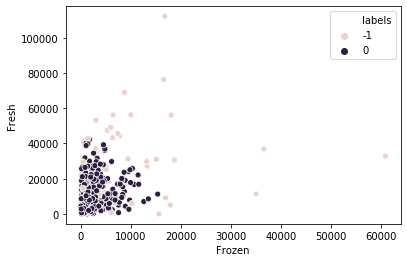

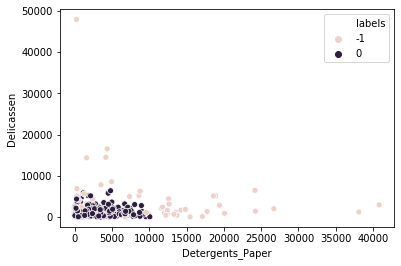

In [13]:
sns.scatterplot(df.Frozen, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Detergents_Paper, df.Delicassen, hue=df.labels)
plt.show()

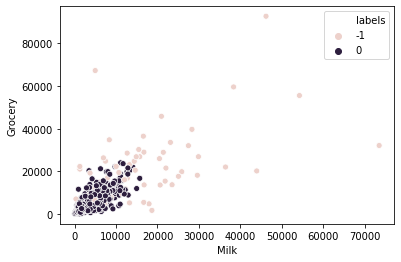

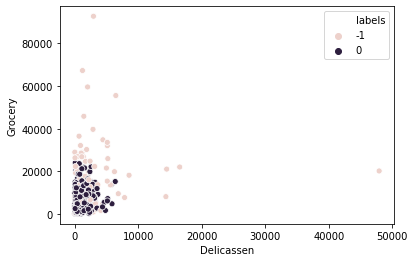

In [16]:
sns.scatterplot(df.Milk, df.Grocery, hue=df.labels)
plt.show()

sns.scatterplot(df.Delicassen, df.Grocery, hue=df.labels)
plt.show()